<a href="https://colab.research.google.com/github/pandian-raja/EVA4_Session14-15A-/blob/master/Dataset_Statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
from pathlib import Path
from torch.utils.data import DataLoader, Dataset
from PIL import Image
from torchvision.transforms import transforms
from matplotlib import pyplot as plt
import torchvision
from torch import nn
import torch
import shutil
from zipfile import ZipFile 
import zipfile

shutil.copy('/content/drive/My Drive/bg_fg_bg_mask_2.zip','bg_fg_bg_mask_2.zip')
shutil.copy('/content/drive/My Drive/Session15/copy_depth_output.zip','copy_depth_output.zip')
zip = ZipFile('/tmp/bg_fg_bg_mask_2.zip')
zip.extractall('./')
zip = ZipFile('/tmp/copy_depth_output.zip')
zip.extractall('./')    

In [0]:
def displayImage(path,ext):
    fig = plt.figure(figsize=(20, 10))
    for i in range(10):
        fig.add_subplot(1, 10, i + 1)
        img = Image.open(path+str(i+1)+ext)
        plt.imshow(img)
        plt.axis('off')


**Dataset Preview**

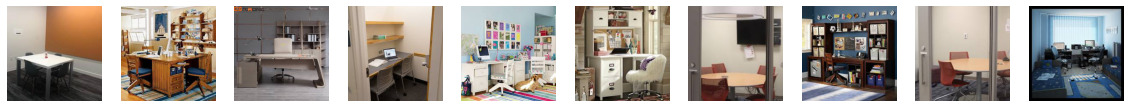

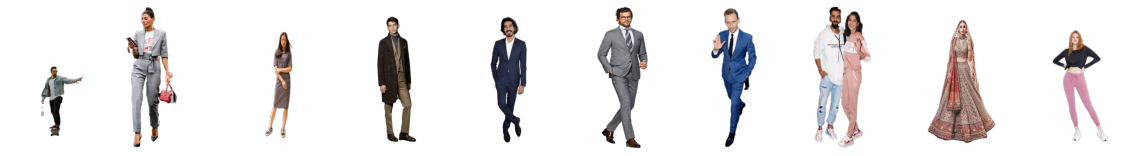

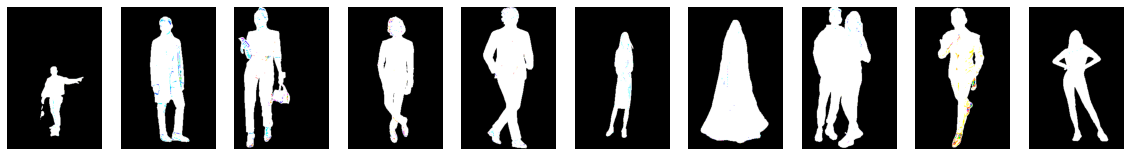

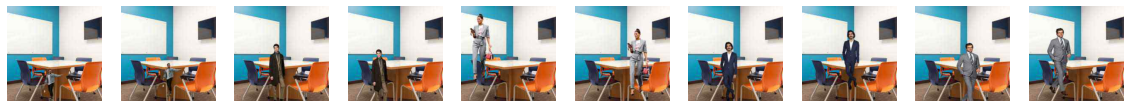

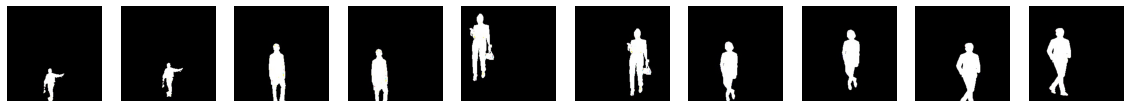

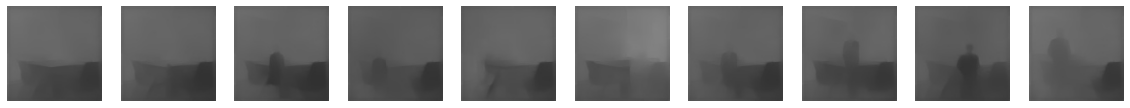

In [56]:
displayImage('/content/drive/My Drive/Session15/finalbg/','.png')
displayImage('/content/drive/My Drive/Session15/Foreground/fg-','.png')
displayImage('/content/drive/My Drive/Session15/Mask/Mask','.png')
displayImage('fg_bg/','.jpeg')
displayImage('mask_fg_bg/','.jpeg')
displayImage('depth/','.jpeg')

**Mean and Std** 

In [0]:
maskdata = torchvision.datasets.ImageFolder( 'mask_fg_bg1/mask_fg_bg/', transforms.ToTensor())
mask = torch.stack([t.mean(1).mean(1) for t, c in maskdata])
print(mask.mean(0))
print(mask.std(0))

tensor([0.0352, 0.0353, 0.0353])
tensor([0.0178, 0.0179, 0.0180])


In [0]:
depthdata = torchvision.datasets.ImageFolder( 'depth1/depth/', transforms.ToTensor())
depth = torch.stack([t.mean(1).mean(1) for t, c in depthdata])
print(depth.mean(0))
print(depth.std(0))

tensor([0.3627, 0.3627, 0.3627])
tensor([0.0827, 0.0827, 0.0827])


In [0]:
traindata = torchvision.datasets.ImageFolder( 'fg_bg/', transforms.ToTensor())
image_means = torch.stack([t.mean(1).mean(1) for t, c in traindata])
print(image_means.mean(0))
print(image_means.std(0))

tensor([0.5373, 0.4887, 0.4405])
tensor([0.1111, 0.1161, 0.1190])


In [0]:
# zip = ZipFile('/content/drive/My Drive/Session15/depth_fg_bg.zip')
# zip.extractall('./')
